### Prediction using Supervised Machine Learning

Predicting the percentage of marks of a student based on the number of study hours.  A simple regression problem with just two variables

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading the data

data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization of data for better understanding of correlation between variables

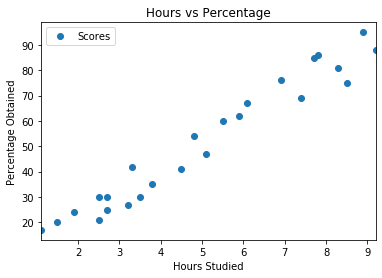

In [6]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()


### Dividing independent and dependent variables

In [7]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

### Splitting data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train) # fitting our model using lr, the LinearRegression object that we created earlier

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the regression line

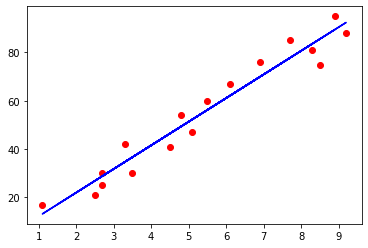

In [13]:
# Plotting the training data
line = lr.coef_*x+lr.intercept_

plt.scatter(x_train, y_train, color='red')
plt.plot(x, line, color='blue');
plt.show()

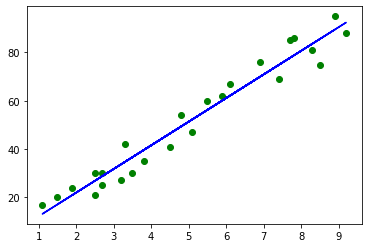

In [14]:
# Plotting for the test data
line = lr.coef_*x+lr.intercept_

plt.scatter(x, y, color='green')
plt.plot(x, line, color='blue');
plt.show()

### Next we predict response on our test data

In [15]:
y_pred = lr.predict(x_test)

In [16]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing Actual vs Predicted

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Plotting of actual vs predicted values

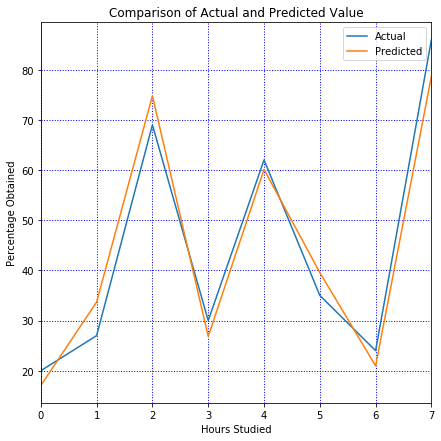

In [18]:
df.plot(kind='line',figsize=(7,7))
plt.title('Comparison of Actual and Predicted Value')
plt.grid(which='major',linestyle=':',linewidth='1',color='blue')
plt.grid(which='minor',linestyle=':',linewidth='1',color='black')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Obtained")
plt.show()

In [19]:
# Testing with our own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Evaluation of the model using the most common performance metrics

In [20]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))


Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
